In [201]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border

In [202]:
def segment_image(image_path, threshold_value, size_filter):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (1280, 720))

    # Apply a binary threshold
    _, binary_img = cv2.threshold(img, threshold_value, 200, cv2.THRESH_BINARY_INV)

    # Morphological operations to close holes and remove noise
    # Structure Element
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 8))
    clean_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

    # Floodfill
    h, w = clean_img.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_floodfill = clean_img.copy()
    cv2.floodFill(im_floodfill, mask=mask, seedPoint=(10, 10), newVal=255);
    img_floodfill_inv = cv2.bitwise_not(im_floodfill)
    img_flood = clean_img | img_floodfill_inv

    # Remove objects touching the border
    segmented_img1 = clear_border(img_flood)

    # Filter objects by size
    counts, hierarchy = cv2.findContours(segmented_img1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    count = 0
    h, w = segmented_img1.shape[:2]
    segmented_img = np.zeros((h, w), dtype=np.uint8)
    for idx, countor in enumerate(counts):
        # Calculate contour area
        area = cv2.contourArea(countor)
        if area > size_filter:
            cv2.drawContours(segmented_img, contours=counts, contourIdx=idx, color=255, thickness=-1)
            count += 1


    return segmented_img, count

In [203]:
def plot_histogram(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Calculate histogram
    plt.hist(img.ravel(), 256, [0, 256])
    plt.title("Grayscale Histogram")
    plt.xlabel("Grayscale value")
    plt.ylabel("Frequency")
    plt.show()

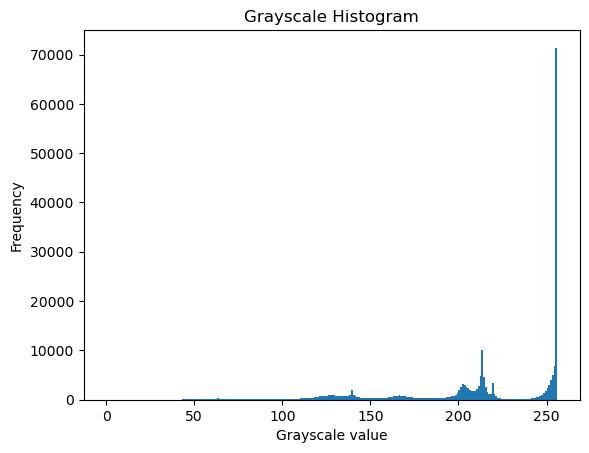

In [204]:
plot_histogram('Avocados.jpg')

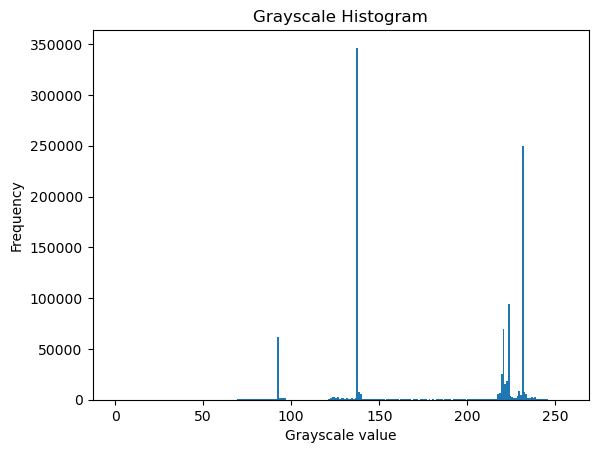

In [205]:
plot_histogram('Leaves.png')

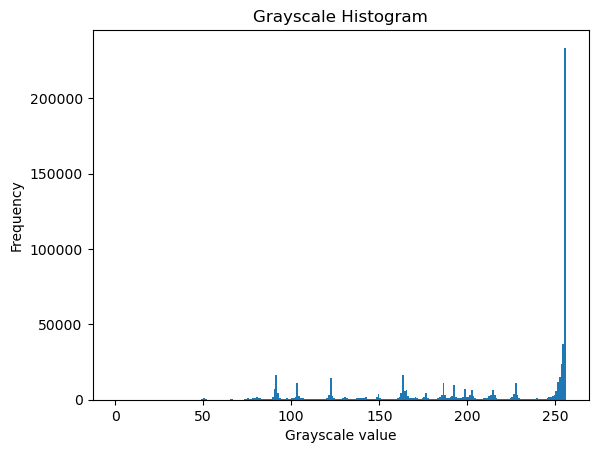

In [206]:
plot_histogram('Fruits.jpg')

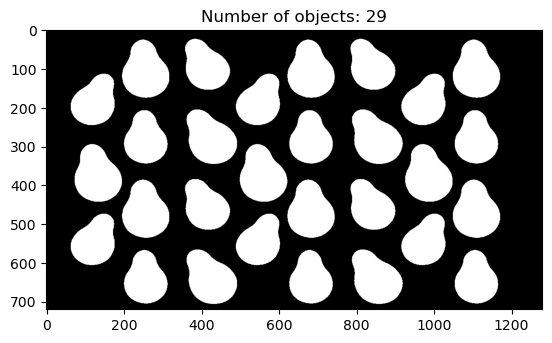

In [207]:
#Avocados.jpg
image_path = 'Avocados.jpg'
threshold_value = 185  # threshold value
size_filter = 3000  # Minimum size of the object to keep

segmented_img, object_count = segment_image(image_path, threshold_value, size_filter)
plt.imshow(segmented_img, cmap='gray')
plt.title(f"Number of objects: {object_count}")
plt.show()

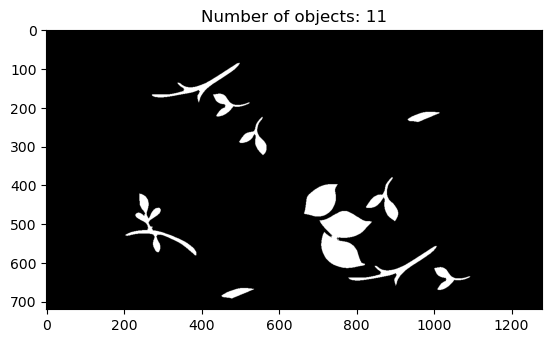

In [214]:
#Leaves.png
image_path = 'Leaves.png'
threshold_value = 120  #threshold value
size_filter = 1000  # Minimum size of the object to keep

segmented_img, object_count = segment_image(image_path, threshold_value, size_filter)
plt.imshow(segmented_img, cmap='gray')
plt.title(f"Number of objects: {object_count}")
plt.show()

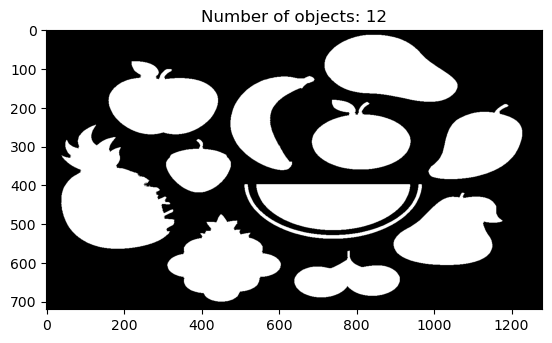

In [209]:
#Fruits.jpg
image_path = 'Fruits.jpg'
threshold_value = 200  #threshold value
size_filter = 4500  # Minimum size of the object to keep

segmented_img, object_count = segment_image(image_path, threshold_value, size_filter)
plt.imshow(segmented_img, cmap='gray')
plt.title(f"Number of objects: {object_count}")
plt.show()